# Import Libraries

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

1. import pandas as pd : mengimpor library pandas dengan alias pd. Pandas digunakan untuk manipulasi dan analisis data tabular.

2. import numpy as np : mengimpor library numpy dengan alias np. Numpy adalah library untuk operasi matematika dan manipulasi array multidimensi.

3. from sklearn.model_selection import train_test_split : mengimpor fungsi train_test_split dari modul model_selection di scikit-learn. Fungsi ini digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian.

4. from sklearn.preprocessing import LabelEncoder : Mengimpor kelas LabelEncoder dari pustaka Scikit-learn (sklearn). LabelEncoder digunakan untuk mengkodekan nilai-nilai dalam suatu kolom kategori menjadi bilangan bulat.

5. from sklearn.metrics import accuracy_score, confusion_matrix : Yaitu dua metrik evaluasi kinerja yang umum digunakan dalam pembelajaran mesin, terutama pada tugas klasifikasi.

6. import matplotlib.pyplot as plt : mengimpor library matplotlib dengan alias plt. Matplotlib adalah library untuk visualisasi data.

7. import seaborn as sns : mengimpor library seaborn dengan alias sns. Seaborn adalah library untuk visualisasi data yang dibangun di atas matplotlib.

8. from sklearn.linear_model import LogisticRegression : Mengimpor kelas LogisticRegression dari modul linear_model di scikit-learn. Kelas ini digunakan untuk membangun model klasifikasi berdasarkan regresi logistik.

9. from sklearn.neighbors import KNeighborsClassifier : Yaitu model klasifikasi yang termasuk dalam keluarga algoritma klasifikasi berbasis instan (instance-based). Algoritma ini termasuk dalam kategori pembelajaran berbasis kelas dan dapat digunakan untuk tugas klasifikasi pada data yang terstruktur.

10. from sklearn.svm import SVC : Mengimpor kelas SVC (Support Vector Classification) dari pustaka Scikit-Learn (sklearn) yang digunakan untuk membangun model Support Vector Machine (SVM) dan model tersebut kemudian dilatih pada data latih dan diuji pada data uji untuk mengukur akurasi.

11. from sklearn.tree import DecisionTreeClassifier : Yaitu model klasifikasi yang termasuk dalam keluarga algoritma pohon keputusan. Algoritma ini bekerja dengan membuat pohon keputusan berdasarkan fitur-fitur dari data latih untuk melakukan prediksi pada data baru.

12. from sklearn.ensemble import RandomForestClassifier : mengimpor kelas RandomForestClassifier dari pustaka scikit-learn (sklearn) yang digunakan untuk tugas klasifikasi dalam pembangunan model machine learning.

13. from sklearn.naive_bayes import GaussianNB : Yaitu model klasifikasi Naive Bayes yang sesuai untuk data yang memiliki distribusi Gaussian (normal). Algoritma ini termasuk dalam keluarga algoritma Naive Bayes, yang berdasarkan pada teorema Bayes dan mengasumsikan independensi antar-fitur.

14. from sklearn.pipeline import Pipeline : Yaitu salah satu fitur penting dalam scikit-learn yang memungkinkan Anda menyusun beberapa langkah pemrosesan data dan model ke dalam satu alur kerja yang koheren.

15. from sklearn.preprocessing import StandardScaler, OneHotEncoder : Yaitu dua alat yang umum digunakan dalam pra-pemrosesan data dalam machine learning. Dimana StandardScaler memiliki fungsi utama untuk melakukan normalisasi atau standarisasi data numerik, Sedangkan OneHotEncoder memiliki fungsi utama untuk mengkodekan variabel kategorikal menjadi bentuk numerik biner (0 atau 1) dalam skema "one-hot encoding".

16. from sklearn.compose import ColumnTransformer : Yaitu bagian dari modul sklearn.compose yang digunakan untuk menggabungkan beberapa transformer ke dalam satu transformer. 

# Data Loading

In [3]:
Bank_additional = pd.read_csv('Bank-additional-full.csv', delimiter=';')

**Program di atas** : digunakan untuk membaca data dari file CSV ke dalam sebuah DataFrame yang di beri nama 'Bank_additional' menggunakan library Pandas.

In [4]:
Bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Program di atas** : digunakan untuk menampilkan beberapa baris pertama dari DataFrame Bank_additional

In [5]:
Bank_additional.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**Program di atas** : digunakan untuk menampilkan beberapa baris terakhir dari DataFrame Bank_additional.

In [6]:
Bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Program di atas** : digunakan untuk memberikan informasi terperinci tentang DataFrame Bank_additional

In [7]:
Bank_additional.shape

(41188, 21)

**Program di atas** : digunakan untuk mendapatkan dimensi dari DataFrame nyc_rolling yang menyatakan jumlah baris dan kolom dalam DataFrame. pada output di atas menandakan bahwa DataFrame ini memiliki 41188 baris dan 21 kolom

# Data Cleaning

In [28]:
Bank_additional.isna().sum() /len(Bank_additional) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

**Program di atas** : digunakan untuk menghitung persentase missing values (nilai yang hilang) untuk setiap kolom dalam DataFrame Bank_additional.

In [18]:
Bank_additional.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

**Program di atas** : digunakan untuk menghitung persentase missing values (nilai yang hilang) untuk setiap kolom dalam DataFrame Bank_additional.

In [19]:
Bank_additional.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**Program di atas** : digunakan untuk menghasilkan statistik deskriptif ringkas dari kolom-kolom numerik dalam DataFrame Bank_additional.

In [21]:
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                     'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
                     'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Bank_additional = Bank_additional[selected_columns]

**Program di atas** : digunakan untuk memilih kolom tertentu dari DataFrame Bank_additional dan menyimpan DataFrame yang baru dengan kolom-kolom tersebut dalam variabel yang sama (Bank_additional).

In [22]:
le = LabelEncoder()

**Program di atas** : digunakan untuk membuat objek dari kelas LabelEncoder dalam library scikit-learn. LabelEncoder digunakan untuk mengkodekan label atau variabel target menjadi nilai numerik.

In [23]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    Bank_additional[col] = le.fit_transform(Bank_additional[col])

**Program di atas** :  digunakan untuk menerapkan LabelEncoder pada beberapa kolom kategorikal dalam DataFrame Bank_additional

In [24]:
Bank_additional['y'] = le.fit_transform(Bank_additional['y'])

**Program di atas** : digunakan untuk mengonversi variabel target 'y' dalam DataFrame Bank_additional menjadi bentuk numerik menggunakan LabelEncoder. 

In [25]:
Bank_additional.fillna(Bank_additional.mean(), inplace=True)

**Program di atas** : digunakan untuk mengisi nilai-nilai yang hilang (missing values) dalam DataFrame Bank_additional dengan nilai rata-rata dari setiap kolomnya.

In [26]:
Q1 = Bank_additional['age'].quantile(0.25)
Q3 = Bank_additional['age'].quantile(0.75)
IQR = Q3 - Q1
Bank_additional = Bank_additional[~((Bank_additional['age'] < (Q1 - 1.5 * IQR)) | (Bank_additional['age'] > (Q3 + 1.5 * IQR)))]

**Program di atas** : digunakan untuk melakukan deteksi dan penghapusan outlier pada kolom 'age' dalam DataFrame Bank_additional dengan menggunakan metode IQR (Interquartile Range).

# Exploratory Data Analysis

In [47]:
print(Bank_additional.describe())

                age           job       marital     education       default  \
count  40719.000000  40719.000000  40719.000000  40719.000000  40719.000000   
mean      39.599008      3.711535      1.177730      3.763403      0.210221   
std        9.674971      3.611172      0.608218      2.122950      0.407651   
min       17.000000      0.000000      0.000000      0.000000      0.000000   
25%       32.000000      0.000000      1.000000      2.000000      0.000000   
50%       38.000000      2.000000      1.000000      3.000000      0.000000   
75%       47.000000      7.000000      2.000000      6.000000      0.000000   
max       69.000000     11.000000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  40719.000000  40719.000000  40719.000000  40719.000000  40719.000000   
mean       1.071220      0.327538      0.368256      4.229426      2.004421   
std        0.985322      0.723682      0.482337    

**Program di atas** : digunakan untuk memeriksa apakah 'y' terdapat dalam dataframe atau tidak, yang dimana 'y' adalah variabel target

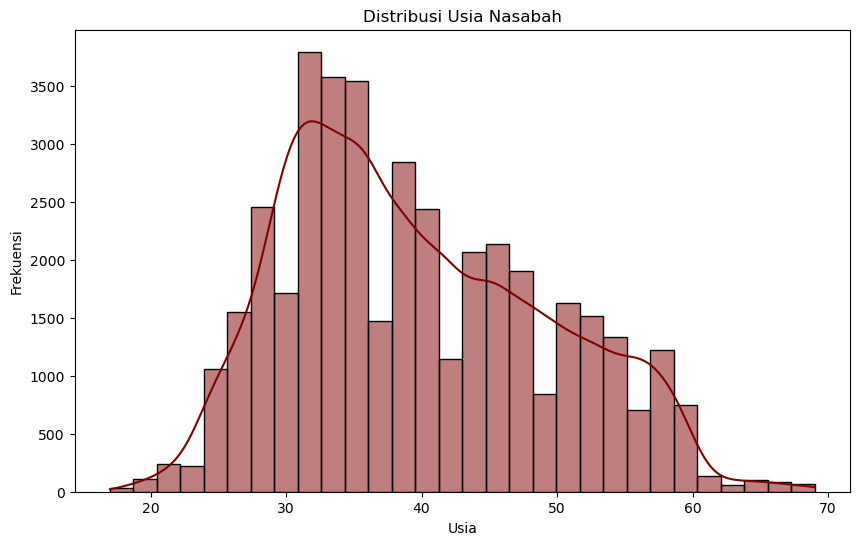

In [160]:
plt.figure(figsize=(10, 6))
sns.histplot(Bank_additional['age'], bins=30, kde=True, color='maroon')
plt.title('Distribusi Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

**Program di atas** : digunakan untuk membuat histogram yang menggambarkan distribusi usia nasabah dalam DataFrame Bank_additional.

Pada output di atas dapat dilihat bahwa balok tertinggi berada di angka 30-40 dengan frekuensi melebihi 3500 yang berarti rentang usia 30-40 tahun memiliki konsentrasi nasabah yang lebih tinggi dibandingkan dengan rentang usia lainnya.

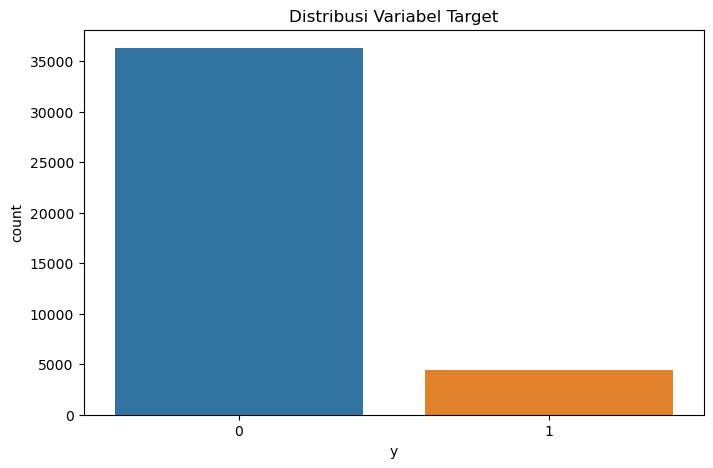

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=Bank_additional)
plt.title('Distribusi Variabel Target')
plt.show()

**Program di atas** : digunakan untuk membuat plot batang (countplot) yang menunjukkan distribusi variabel target (y). 

Pada output di atas menampilkan bahwa balok dengan angka biner '0' (tidak) lebih tinggi dari '1'(ya) begitupun frekuensinya yang artinya target memperoleh hasil '0'(tidak) lebih tinggi dari '1'(ya)

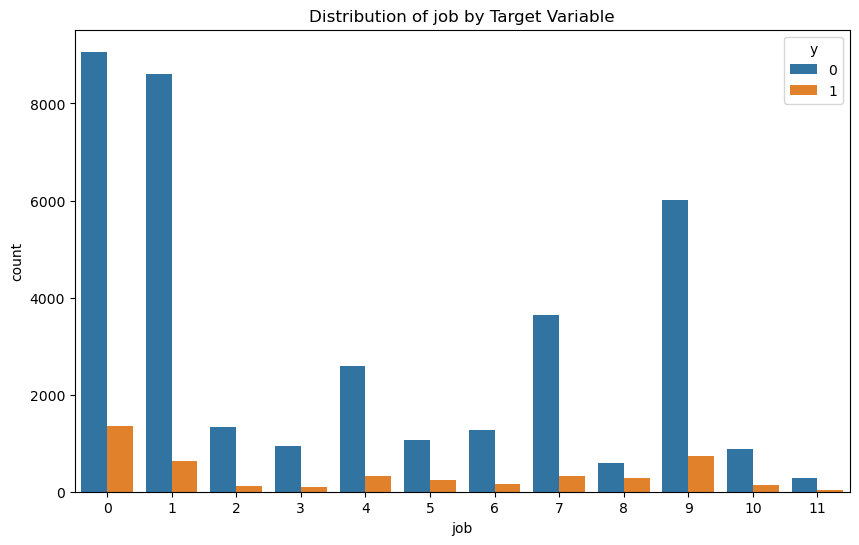

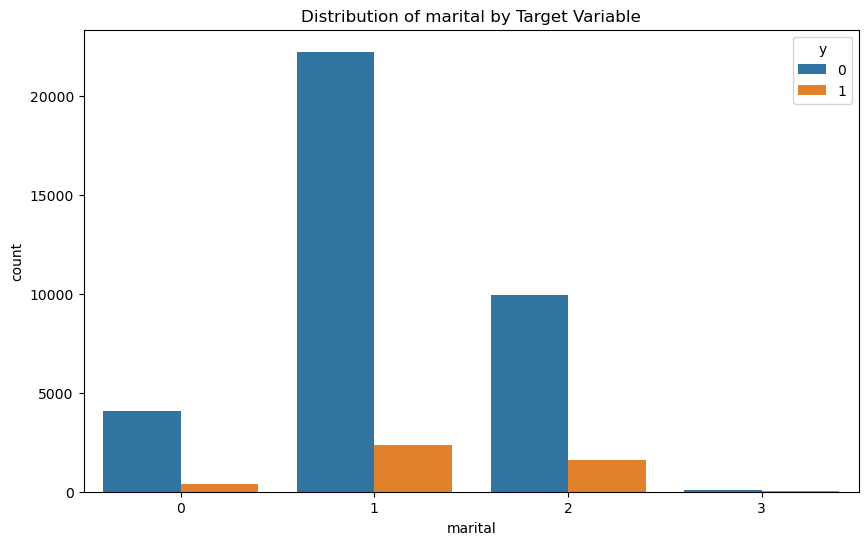

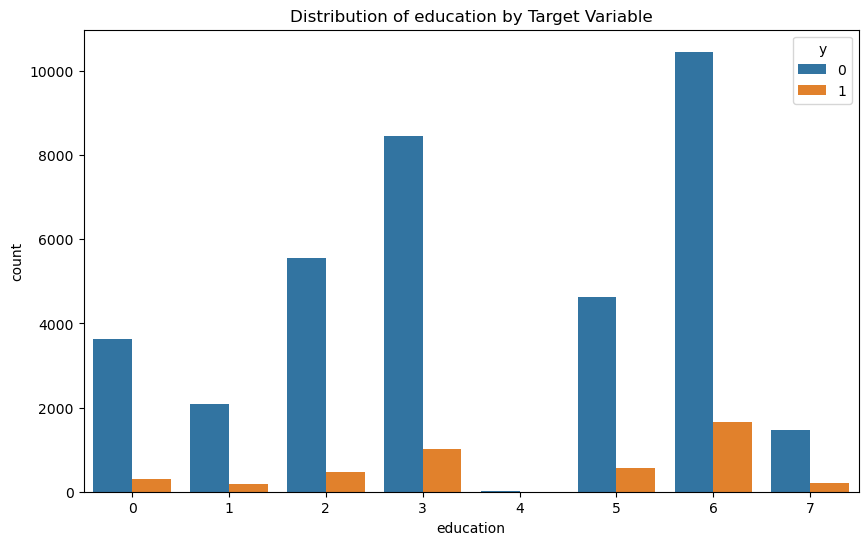

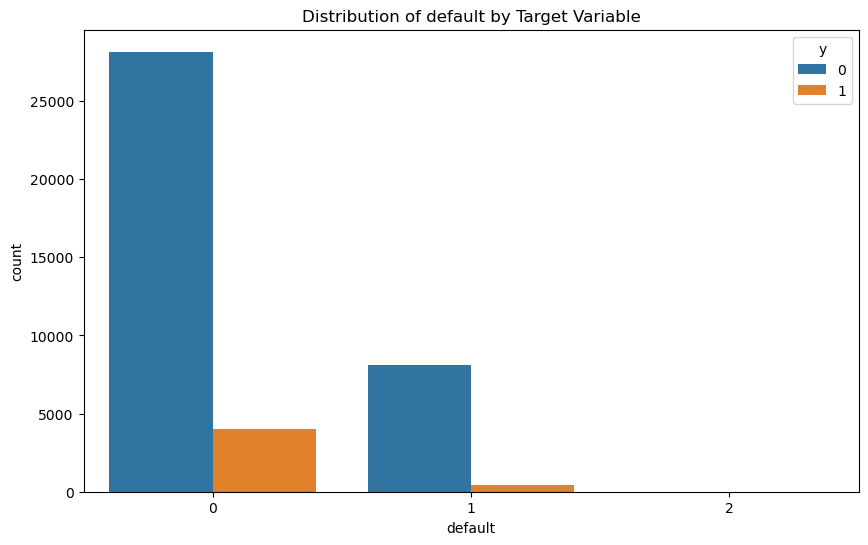

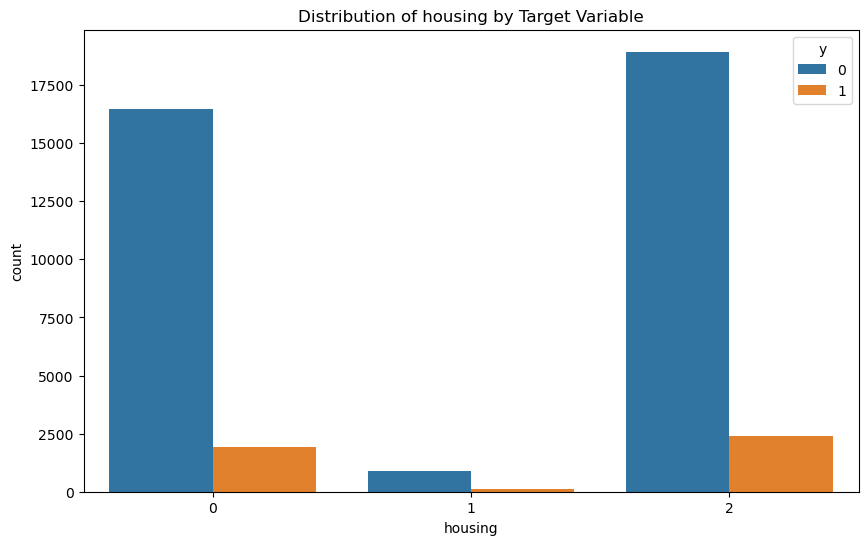

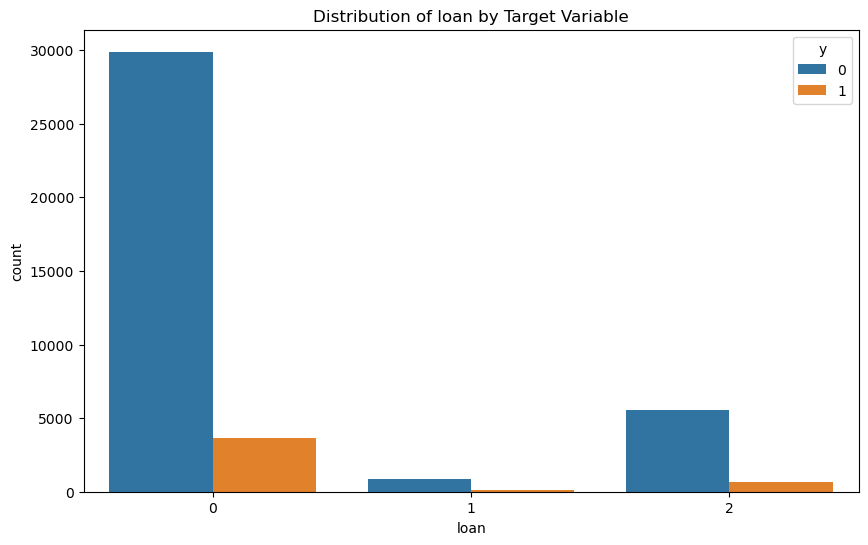

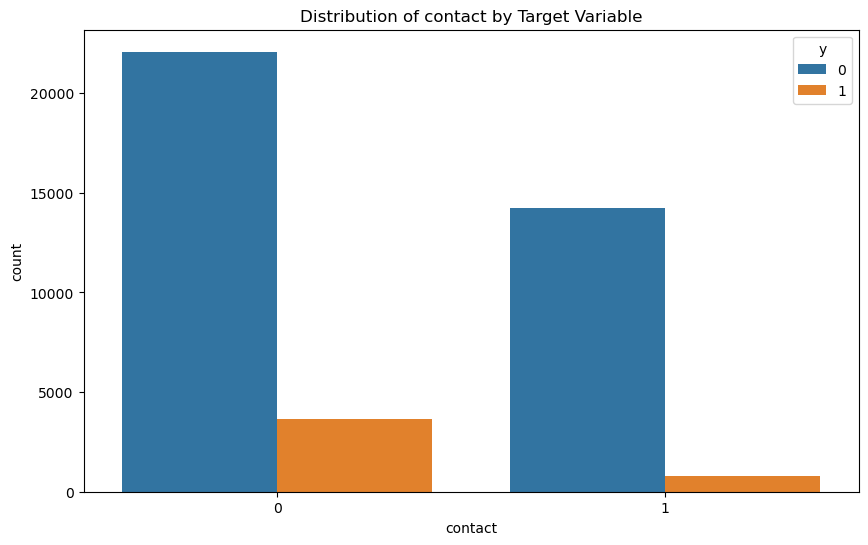

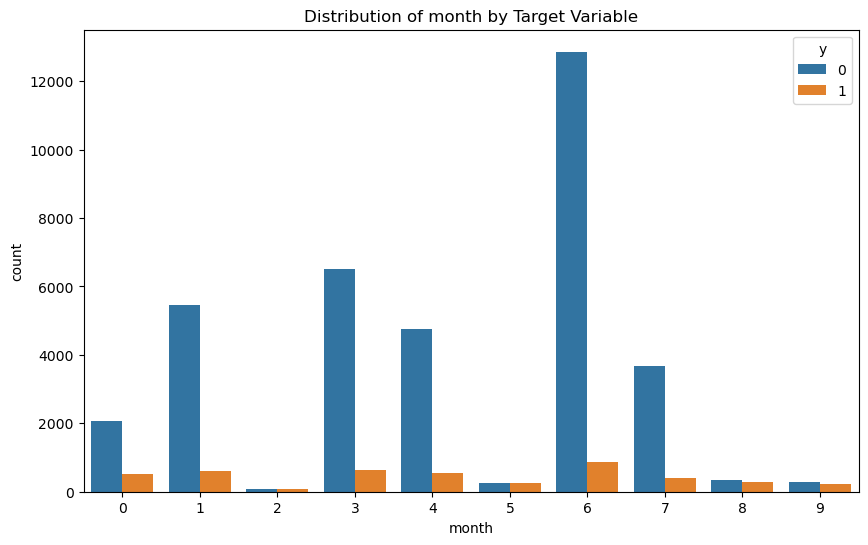

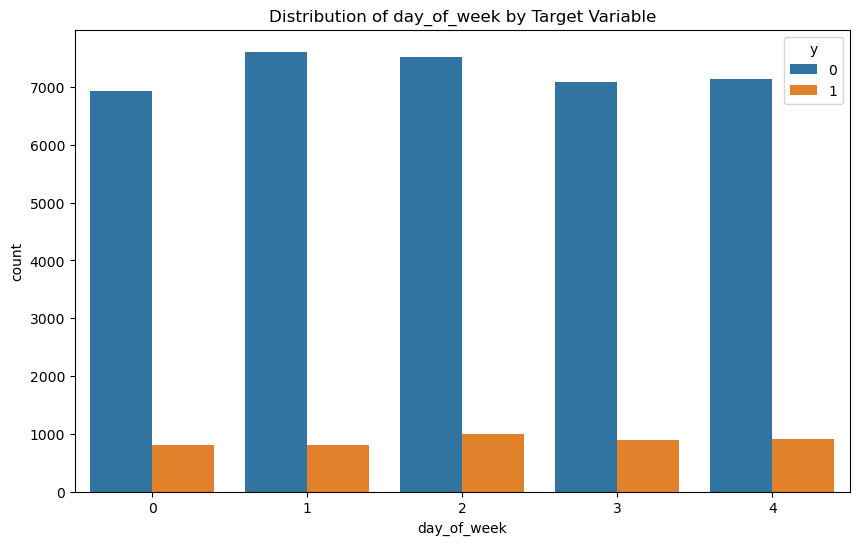

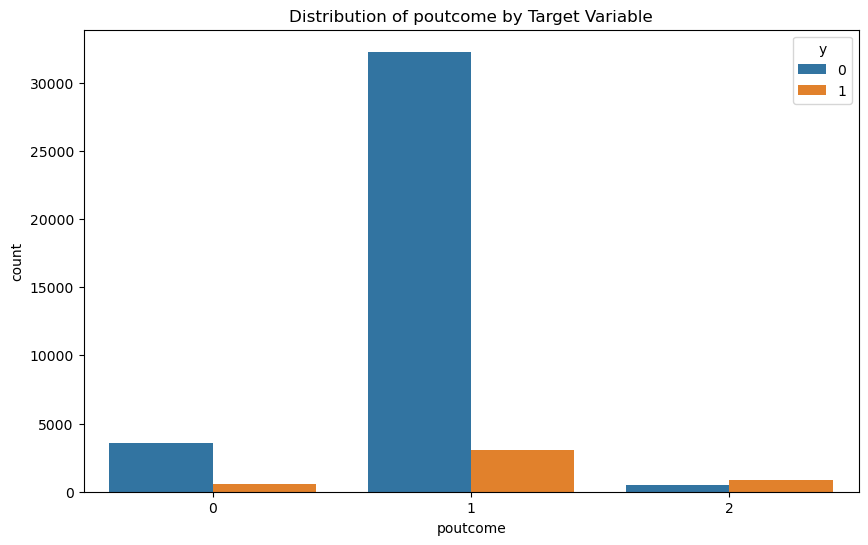

In [51]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='y', data=Bank_additional)
    plt.title(f'Distribution of {col} by Target Variable')
    plt.show()

**Program di atas** : digunakan untuk membuat plot countplot untuk masing-masing variabel kategorikal dalam dataset dan membaginya berdasarkan variabel target (y). Setiap plot menunjukkan distribusi kategori dalam variabel tertentu dan membedakannya berdasarkan apakah nasabah berlangganan deposito berjangka atau tidak.

Pada output di atas, masing-masing menampilkan balok '0' (tidak) lebih tinggi daripada '1' (ya).

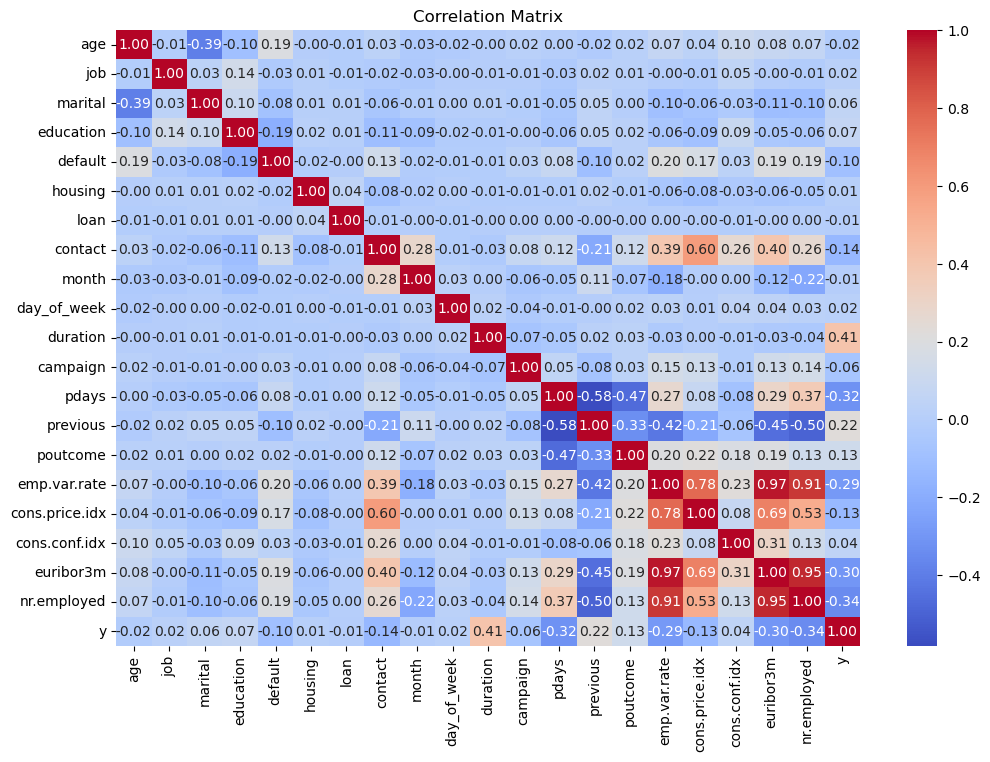

In [53]:
correlation_matrix = Bank_additional.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Program di atas** : digunakan untuk membuat matriks korelasi dan menampilkan visualisasi dalam bentuk heatmap.

Output di atas adalah matriks korelasi dalam dataframe Bank_additional

# Data Preprocessing

## Logistic Regression

In [54]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y'] 

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [56]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** : digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [60]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])

**Program di atas** : digunakan untuk mendefinisikan dua transformer yang akan digunakan dalam pemrosesan data menggunakan scikit-learn yang dimana kedua transformer ini nantinya akan digunakan dalam sebuah ColumnTransformer untuk mengaplikasikan transformasi yang berbeda pada variabel numerik dan kategorikal dalam satu langkah pemrosesan data.

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [65]:
from sklearn.linear_model import LogisticRegression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

**Program di atas** : digunakan untuk membuat suatu model yang merupakan gabungan dari dua langkah utama yaitu Preprocessor yang akan memproses data, termasuk scaling untuk variabel numerik dan one-hot encoding untuk variabel kategorikal dan Classifier yang menggunakan model klasifikasi Logistik Regresi dari Scikit-Learn. 

In [66]:
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression())])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi Logistik Regresi, lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [68]:
y_pred = model.predict(X_test)

**Program di atas** :  digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya. 

In [70]:
from sklearn.metrics import classification_report

print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.91

Confusion Matrix:
[[7074  180]
 [ 519  371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7254
           1       0.67      0.42      0.51       890

    accuracy                           0.91      8144
   macro avg       0.80      0.70      0.73      8144
weighted avg       0.90      0.91      0.91      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi. 

Output di atas menampilkan bahwa akurasi model menggunakan logistic regression adalah 0.91

## K-Nearest Neighbors 

In [72]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y']

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [74]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** : digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [75]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])

**Program di atas** : digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [92]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

**Program di atas** : digunakan untuk membuat sebuah pipeline (pipa pemrosesan) untuk model K-Nearest Neighbors (KNN) menggunakan Scikit-Learn. Didalamnya ada preprocessor yaitu transformer yang melakukan pemrosesan data, termasuk pengelolaan variabel numerik dan kategorikal dan ada classifier yaitu tahap terakhir dari pipa, di mana model K-Nearest Neighbors diaplikasikan. Pada kasus ini, n_neighbors=5 menunjukkan bahwa model KNN akan menggunakan 5 tetangga terdekat untuk membuat prediksi.

In [93]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', KNeighborsClassifier())])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi K-Nearest Neighbors (KNN), lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [94]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya. 

In [95]:
print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.90

Confusion Matrix:
[[6992  262]
 [ 518  372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7254
           1       0.59      0.42      0.49       890

    accuracy                           0.90      8144
   macro avg       0.76      0.69      0.72      8144
weighted avg       0.89      0.90      0.90      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi.

Output di atas menampilkan bahwa akurasi model menggunakan K-Nearest Neighbors (KNN) adalah 0.90

## Support Vector Machine 

In [81]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y'] 

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [83]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [84]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [85]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [86]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(kernel='linear', random_state=42))])

**Program di atas** : digunakan untuk membuat sebuah pipeline dalam Scikit-Learn yang terdiri dari dua langkah utama yaitu Preprocessing (preprocessor) yaitu langkah pertama dalam pipeline yang menerapkan transformasi pada data, termasuk penskalaan variabel numerik dan encoding variabel kategorikal dan Model Classifier (classifier) yang  menggunakan Support Vector Classifier (SVC) dengan kernel linear. SVC adalah jenis model Support Vector Machine (SVM) yang dapat digunakan untuk masalah klasifikasi. Kernel linear dipilih di sini, yang berarti model akan mencoba menemukan batas keputusan linear dalam ruang fitur.

In [87]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi Support Vector Machine, lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [96]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya.

In [98]:
print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.90

Confusion Matrix:
[[6992  262]
 [ 518  372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7254
           1       0.59      0.42      0.49       890

    accuracy                           0.90      8144
   macro avg       0.76      0.69      0.72      8144
weighted avg       0.89      0.90      0.90      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi.

Output di atas menampilkan bahwa akurasi model menggunakan Support Vector Machine adalah 0.90 sama seperti model sebelumnya yaitu K-Nearest Neighbors (KNN).

## Decision Tree 

In [99]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y'] 

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [101]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [102]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])


**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [103]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [104]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

**Program di atas** : digunakan untuk membuat sebuah pipeline dalam Scikit-Learn yang terdiri dari dua langkah utama yaitu Preprocessing (preprocessor) yaitu langkah pertama dalam pipeline yang menerapkan transformasi pada data, termasuk penskalaan variabel numerik dan encoding variabel kategorikal dan Model Classifier (classifier) yaitu  model yang dapat digunakan untuk masalah klasifikasi dan regresi. Dalam hal ini, kita menggunakan classifier, yang berarti model akan membuat keputusan kategorikal.

In [105]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi Decision Tree, lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [106]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya.

In [107]:
print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.89

Confusion Matrix:
[[6810  444]
 [ 412  478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7254
           1       0.52      0.54      0.53       890

    accuracy                           0.89      8144
   macro avg       0.73      0.74      0.73      8144
weighted avg       0.90      0.89      0.90      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi.

Output di atas menampilkan bahwa akurasi model menggunakan Decision Tree adalah 0.89

## Random Forest

In [108]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y']

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [110]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [111]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [113]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

**Program di atas** : digunakan membuat pipeline dalam Scikit-Learn. Ini terdiri dari dua langkah utama yaitu Preprocessing (preprocessor) yaitu langkah pertama dalam pipelineyang menerapkan transformasi pada data, termasuk penskalaan variabel numerik dan encoding variabel kategorikal dan Random Forest Classifier (classifier) yaitu langkah kedua dalam pipeline yang merupakan suatu algoritma ensemble yang terdiri dari beberapa decision trees. Setiap tree memberikan prediksi, dan hasil akhir diambil melalui suatu proses agregasi, seperti pemilihan mayoritas.

In [114]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi Random Forest, lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [115]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya.

In [116]:
print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.91

Confusion Matrix:
[[7055  199]
 [ 503  387]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7254
           1       0.66      0.43      0.52       890

    accuracy                           0.91      8144
   macro avg       0.80      0.70      0.74      8144
weighted avg       0.90      0.91      0.91      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi.

Output di atas menampilkan bahwa akurasi model menggunakan Random Forest adalah 0.91

## Naive Bayes 

In [117]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y']

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [119]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [120]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])


**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [121]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [161]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GaussianNB())])

**Program di atas** : digunakan untuk membuat pipeline dalam Scikit-Learn yang menggunakan model Naive Bayes, khususnya GaussianNB yang merupakan implementasi Naive Bayes untuk distribusi Gaussian yang langkah-langkah pipelinenya mirip dengan penjelasan sebelumnya. Hanya saja menggunakan model Naive Bayes, khususnya GaussianNB yang bekerja berdasarkan asumsi distribusi Gaussian (normal) pada setiap kelas, dan dianggap "naif" karena mengasumsikan independensi antara setiap pasangan fitur.

In [123]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', GaussianNB())])

**Program di atas** : digunakan untuk melatih (train) model pada data latih. Proses pelatihan ini melibatkan dua langkah utama yaitu Preprocessing yang dimana data latih (X_train) akan diproses menggunakan transformer yang telah didefinisikan dalam preprocessor yang nantinya transformer ini akan mengubah data menjadi format yang sesuai dengan kebutuhan model dan Pelatihan Model yang dimana data yang telah diproses kemudian digunakan untuk melatih model klasifikasi Naive Bayes, lalu model akan mempelajari pola dan hubungan antara fitur-fitur input (X) dan variabel target (y) dari data latih.

In [124]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya.

In [125]:
print(f'Akurasi Model: {accuracy_score(y_test, y_pred):.2f}\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Akurasi Model: 0.82

Confusion Matrix:
[[6047 1207]
 [ 291  599]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7254
           1       0.33      0.67      0.44       890

    accuracy                           0.82      8144
   macro avg       0.64      0.75      0.67      8144
weighted avg       0.89      0.82      0.84      8144



**Program di atas** : digunakan untuk mengevaluasi kinerja model klasifikasi.

Output di atas menampilkan bahwa akurasi model menggunakan Naive Bayes adalah 0.82

## Confusion Matrix 

In [126]:
X = Bank_additional.drop('y', axis=1)
y = Bank_additional['y']

**Program di atas** : digunakan untuk memisahkan dataset menjadi dua bagian antara fitur-fitur (variabel independen) yaitu 'x' dan target (variabel dependen) yaitu 'y' untuk melatih dan menguji model.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Program di atas** : digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu untuk pengujian model (testing set).

In [128]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [129]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaling untuk variabel numerik
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding untuk variabel kategorikal
])

**Program di atas** :  digunakan untuk membagi kolom-kolom dalam dataset menjadi dua kelompok, yaitu kolom-kolom kategorikal dan numerik.

In [130]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**Program di atas** : digunakan untuk mengaplikasikan berbagai transformasi pada kolom-kolom tertentu dalam suatu dataset. Dalam hal ini, preprocessor akan digunakan untuk memproses data pada dua jenis kolom: numerik (numeric_cols) dan kategorikal (categorical_cols).

In [136]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

**Program di atas** : digunakan untuk membuat pipeline dalam Scikit-Learn yang menggunakan model Logistic Regression dan memiliki Langkah-langkah pipeline yang mirip dengan yang telah dijelaskan pada model sebelumnya yang juga digunakan untuk tugas klasifikasi biner dan mengestimasi probabilitas bahwa instance tertentu termasuk ke dalam kelas positif. Parameter random_state=42 digunakan untuk memastikan reproduktibilitas hasil.

In [137]:
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression(random_state=42))])

**Program di atas**

In [138]:
y_pred = model.predict(X_test)

**Program di atas** : digunakan untuk melakukan prediksi variabel target (y) pada data uji (X_test) dengan menggunakan model yang telah dilatih sebelumnya.

In [139]:
cm = confusion_matrix(y_test, y_pred)

**Program di atas** : digunakan untuk untuk menghitung confusion matrix dari model klasifikasi. Confusion matrix adalah tabel yang digunakan untuk mengevaluasi kinerja suatu model klasifikasi pada suatu kumpulan data. 

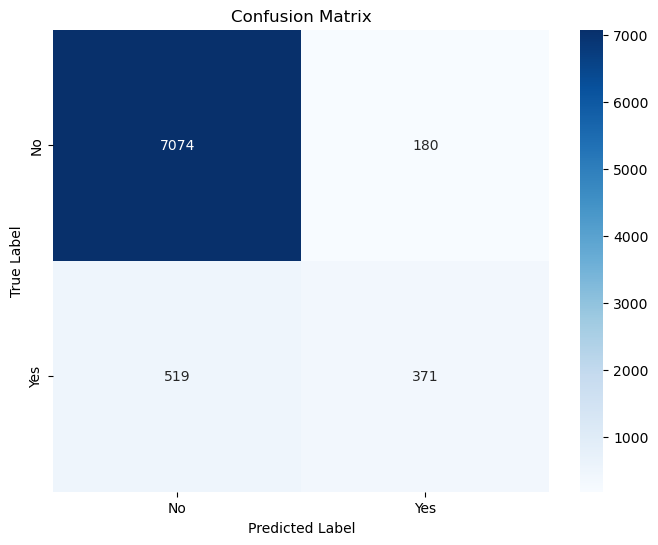

In [140]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Program di atas** : digunakan untuk membuat plot visualisasi confusion matrix menggunakan heatmap.

Output di atas menampilkan kolom 'No' dengan angka 7074 sangat biru yang artinya memiliki nilai yang sangat tinggi di banding 'Yes' itu artinya nasabah lebih banyak tidak berlangganan deposito berjangka daripada yang berlangganan deposito

# Kesimpulan

1. Dataset yang digunakan dalam tugas ini adalah "Bank additional full" yang terdiri dari 41188 baris dan 21 kolom. Didalamnya berisi informasi perjalanan usia, pekerjaan, dll. Dikarenakan tujuan utama dalam projek ini adalah untuk memprediksi apakah nasabah akan berlangganan (ya/tidak) deposito berjangka (variabel y). maka fitur y merupakan variabel dependent yang akan menjadi predictand. Maka dari itu dilakukan analisis dengan menggunakan fungsi korelasi dan heatmap plot dari 21 fitur di ambil lah fitur emp.var.ratedan euribor3m karena fitur-fitur tersebut memiliki korelasi yang cukup berpengaruh ke variabel dependent (y).

2. Pada section EDA dapat dilihat, bahwa balok dengan angka biner '0' (tidak) lebih tinggi dari '1'(ya) begitupun frekuensinya yang artinya target memperoleh hasil '0'(tidak) lebih tinggi dari '1'(ya) dan pada confusion matrix juga dapat dilihat bahwa kolom 'No' dengan angka 7074 sangat biru yang artinya memiliki nilai yang sangat tinggi di banding 'Yes' itu nasabah lebih banyak tidak berlangganan deposito berjangka daripada yang berlangganan deposito.

Target telah di dapatkan dengan hasil nasabah lebih banyak tidak berlangganan deposito berjangka daripada yang berlangganan deposito menggunakan 2 model yang memiliki hasil yang sama yaitu logistic regression dan random forest dengan hasil 0.91%